Luis Garrido 20240202

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**

![](https://www.digitalcitizen.life/wp-content/uploads/2020/01/google_play.png)

## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Parte 1

<div class="alert alert-block alert-success">
    <b>Github:</b> 
    <p>Para acceder al proyecto en Github:
        <br><a href="https://github.com/lgarridocornejo/UDD_gplay.git">Github</a>
        <br>Si te gusto el proyecto, no olvides regalarme una estrella
<p> El proyecto se dividio en dos partes:
        <ul>
        <li>EDA que corresponde al analisis inicial y que corresponde a este archivo</li>
        <li>Modelo, que contempla la creación del modelo y sus metricas, así como las predicciones y las pruebas</li>
        </ul>
</div>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 1)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import re

In [3]:
import sys
sys.path.append('lib')
from examinar import EDA
from normalizacion import NLP

In [4]:
from wordcloud import WordCloud, ImageColorGenerator
import multidict as multidict
from collections import Counter
import nltk

In [5]:
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
try:
    import squarify as sq
except ImportError:
    !pip install squarify  
    import squarify as sq

In [8]:
try:
    import joypy
except ImportError:
    !pip install joypy  
    import joypy

In [9]:
try:
    import joblib
except ImportError:
    !pip install joblib  # instala la librería
    import joblib

---

In [10]:
def reemplazar(texto, patron, reemplazo):
    temp = re.sub(patron, reemplazo, texto)
    return " ".join(temp.split()) 

In [11]:
def plotbarras(df, col, orden= None, clases=None,colbar=False):
    gvalor = df[col].value_counts()[:4]
    #orden = df[col].value_counts().index
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=df, order = orden, hue=clases) #palette='Paired'
    if colbar == False:
        for bar in ax.patches:
            if bar.get_height() == gvalor[0]:
                bar.set_color(gcolor[0])  
            elif bar.get_height() == gvalor[1]:
                bar.set_color(gcolor[1]) 
            elif bar.get_height() == gvalor[2]:
                bar.set_color(gcolor[2])
            elif bar.get_height() == gvalor[3]:
                bar.set_color(gcolor[3])
            else:
                bar.set_color('lightgrey')
    plt.xticks(rotation=90)
    plt.title('Distribución: '+ col)
    plt.savefig('Distribucion_'+ col,bbox_inches='tight')
    plt.show()  

In [12]:
def bloques(features):
    data = play[features].value_counts().reset_index()#.rename(columns={features: 'labels', 0: 'count'}) #dict(play[features].value_counts())
    #print(data)
    llave = data.iloc[:,0]
    valor = data.iloc[:,1]
    ax = sq.plot(sizes = valor,
            color=sns.color_palette('Paired', len(valor)), #Spectral  #Paired
            label = llave,
            #text_kwargs={'fontsize':5, 'fontname':"Times New Roman Bold",'weight':'bold'},
            pad = True,
            alpha=0.9
           )
    plt.axis("off")
    plt.title('Calificación de contenido')
    plt.show()

---

In [13]:
play = pd.read_csv('data/googleplaystore.csv').dropna()
print(f'***** el dataset contine {play.shape[0]} registros y {play.shape[1]} columnas')

***** el dataset contine 9360 registros y 13 columnas


In [14]:
play.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [15]:
rplay = EDA(play)
rplay.infoplus()

,columna,tipo,total,faltantes,pct,unico
0,App,object,9360,0,100.0,8190
1,Category,object,9360,0,100.0,33
2,Rating,float64,9360,0,100.0,39
3,Reviews,object,9360,0,100.0,5990
4,Size,object,9360,0,100.0,413
5,Installs,object,9360,0,100.0,19
6,Type,object,9360,0,100.0,2
7,Price,object,9360,0,100.0,73
8,Content Rating,object,9360,0,100.0,6
9,Genres,object,9360,0,100.0,115


In [16]:
col = play.columns
play = rplay.duplicados(col)

***** El dataset original contiene 9360 registros y 13 atributos
Total de registros unicos: 8886
Total de registros duplicados: 474
***** El dataset sin duplicados contiene 8886 registros y 13 atributos



---
## EDA
### Categoría

In [17]:
gcolor = ['#ea4235','#34a855','#4385f6','#f9bb04']

In [18]:
play['Category'].value_counts()

Category
FAMILY                 1717
GAME                   1074
TOOLS                  733 
PRODUCTIVITY           334 
FINANCE                317 
PERSONALIZATION        308 
COMMUNICATION          307 
LIFESTYLE              305 
PHOTOGRAPHY            304 
MEDICAL                302 
SPORTS                 286 
BUSINESS               270 
HEALTH_AND_FITNESS     262 
SOCIAL                 244 
NEWS_AND_MAGAZINES     214 
TRAVEL_AND_LOCAL       205 
SHOPPING               202 
BOOKS_AND_REFERENCE    177 
VIDEO_PLAYERS          160 
DATING                 159 
EDUCATION              129 
MAPS_AND_NAVIGATION    124 
ENTERTAINMENT          111 
FOOD_AND_DRINK         106 
WEATHER                75  
AUTO_AND_VEHICLES      73  
HOUSE_AND_HOME         68  
LIBRARIES_AND_DEMO     64  
ART_AND_DESIGN         61  
COMICS                 58  
PARENTING              50  
EVENTS                 45  
BEAUTY                 42  
Name: count, dtype: int64

In [19]:
#list(play.columns)

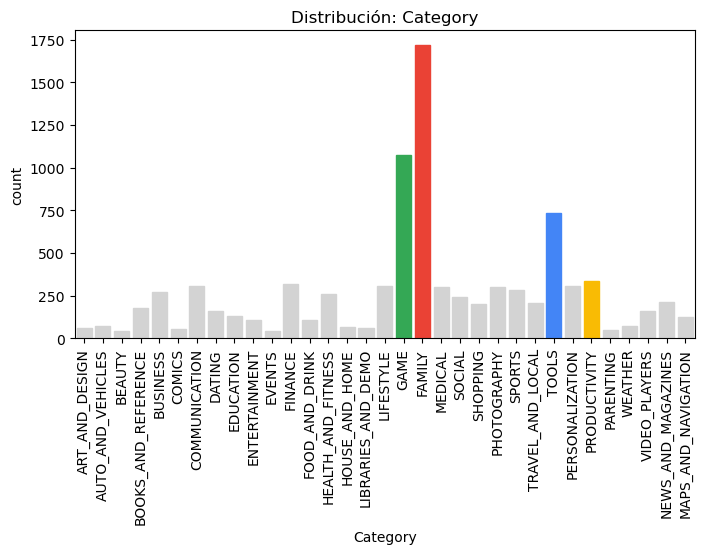

In [20]:
#orden = play['Category'].value_counts().index
plotbarras(play,'Category')

<div class="alert alert-block alert-warning">
    <b>Categorias:</b> 
    <p>Se puede observar que las principañes cuatro categorias son:
        <ul>
        <li>Familia</li>
        <li>Juegos</li>
        <li>Herramientas</li>
        <li>Productividad</li>
        </ul>
</div>

### Valoración

In [21]:
play['Price'] = play['Price'].str.replace('$', '')
play['Price'] = play['Price'].astype('float64')

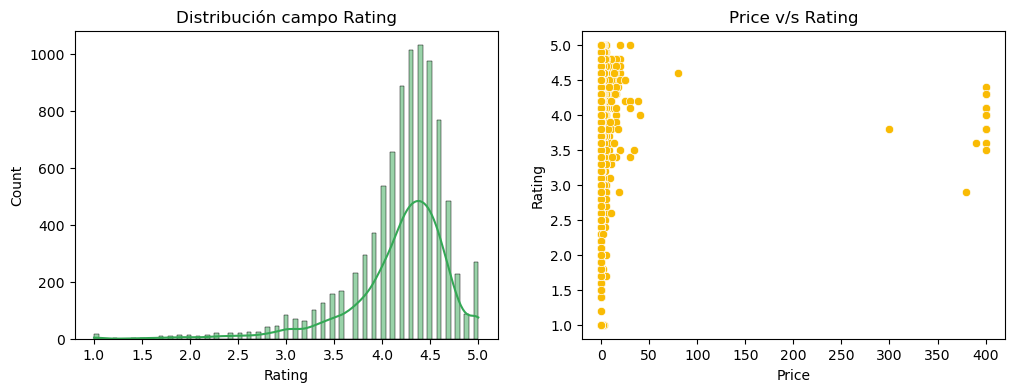

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
sns.histplot(play['Rating'], kde=True, color=gcolor[1])
plt.title('Distribución campo Rating')

plt.subplot(1,2,2)
sns.scatterplot(x='Price', y='Rating', data=play, color=gcolor[3])#,marker='*')
plt.title('Price v/s Rating')
plt.show()

<div class="alert alert-block alert-warning">
    <b>Example:</b> 
    <p>En los siguientes graficos, se ve algunas caracteristicas interesantes
        <ul>
        <li>Se puede observar que un sesgo, si se puede llamar así, a dar buenas valoraciones a las app.
            </li>
        <li>Las app de pago tiene como minimo tres estrellas, ¿podría ser qué se uso de forma gratuita y luego se pagó? ¿Quizás por eso no hay valoraciones negativas?</li>
        </ul>
</div>

### Reviews

In [23]:
play['Reviews'] = play['Reviews'].astype(int)

### Descargas

In [24]:
play['Descargas'] = play['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
#play['Descargas']

### Calificación de contenido

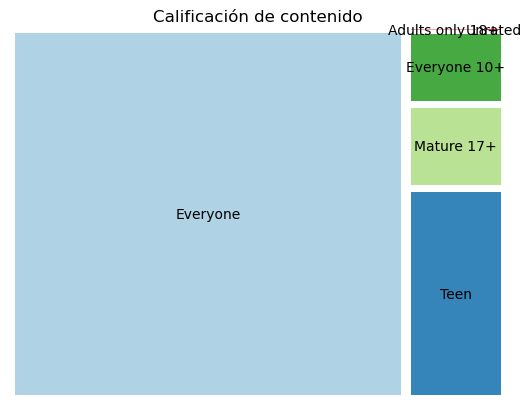

In [25]:
bloques(['Content Rating'])

<div class="alert alert-block alert-warning">
    <b>Calificacón de contenido:</b> 
    <p>En esta representación de "Tree map", se observa cuales son las calificaciones de contenido más populares</div>

### Versión Android

In [26]:
rmplzr = {'- 6.0':'and up','- 7.1.1':'and up','- 8.0':'and up','and up':'','4.0.3':'4.0','2.3.3':'2.3','4.4W':'4.4',
          '2.0.1':'2.0','4.2':'4.1','2.1':'2.0','4.3':'4.1','3.2':'3.0','5.1':'5.0','7.1':'7.0','3.1':'3.0'}

In [27]:
play['Android base'] = play['Android Ver']
for llave in rmplzr:
    valor = rmplzr[llave]
    play['Android base'] = play['Android base'].apply(lambda x : reemplazar(x, llave, valor))  

In [28]:
android_order = []
for item in play['Android base'].unique():
    #print(item)
    android_order.append(item)
android_order.sort()

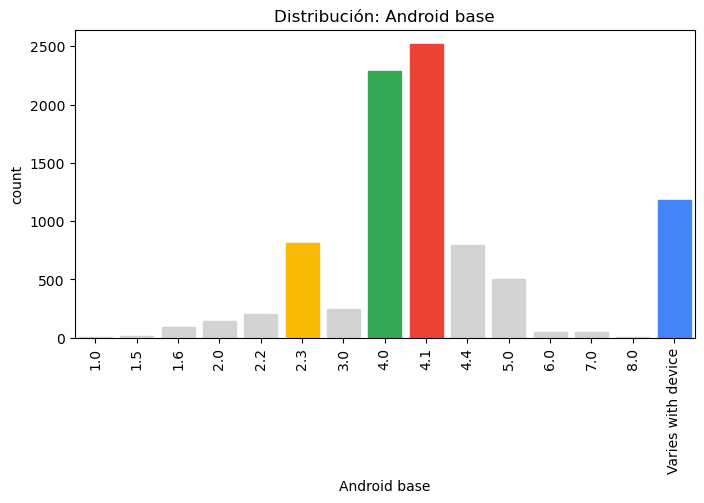

In [29]:
orden = android_order #play['Android base'].value_counts().index
plotbarras(play,'Android base',orden)

<div class="alert alert-block alert-warning">
    <b>Android:</b> 
    <p>Según el gráfico, se observa que la version más actual es la 8.0 (Oreo)
    <br>La versón Android para el desarrollo de app, mayoritariamente es la 4.1 (Jelly Bean)
    <br>La mayoria de los usuarios usan versiones antiguas en sus equipos
    <br>¿Tantas versiones de Andorid, generarán algún problema?
</div>

## Análisis

In [30]:
muestra = play[play['Category'].isin(['FAMILY','GAME','TOOLS','PRODUCTIVITY'])]

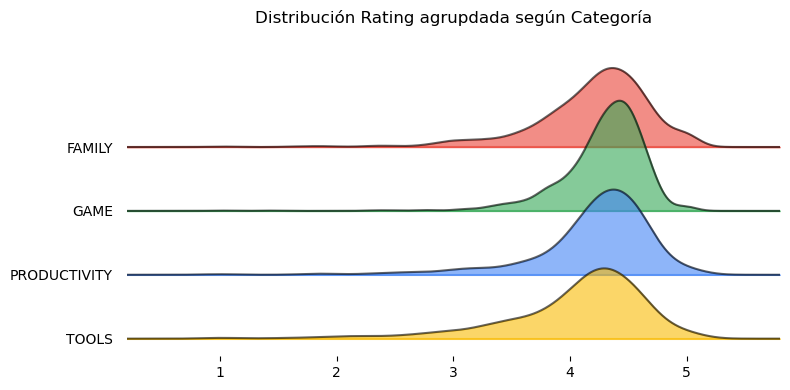

In [31]:
fig, axes = joypy.joyplot(muestra, 
                          column = ['Rating'],
                          by='Category', 
                          #ylim='own', 
                          figsize=(8,4), 
                          legend=False, 
                          #grid = True,
                          color=gcolor, 
                          #hist = True, bins = 50,
                          title = 'Distribución Rating agrupdada según Categoría',
                          alpha=0.6)
plt.savefig('joyplot',bbox_inches='tight')

<div class="alert alert-block alert-warning">
    <b>Distribución:</b> 
    <p>Se puede observar la distribución de las principales cuatro categorias</div>

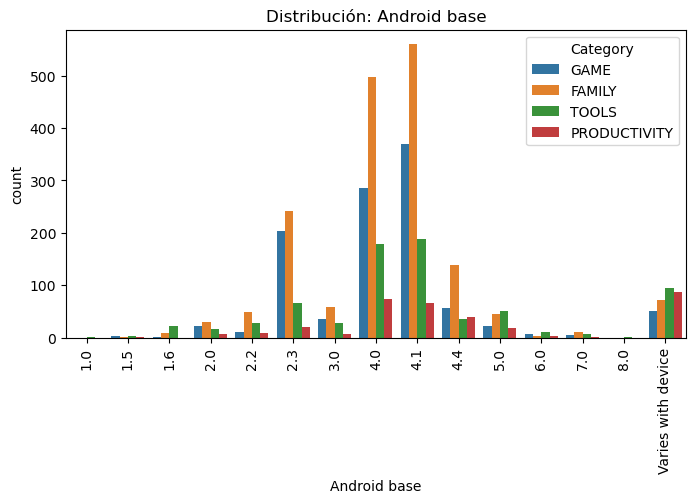

In [32]:
plotbarras(muestra,'Android base',android_order,'Category',True)

<div class="alert alert-block alert-warning">
    <b>Android/Categorias:</b> 
    <p>Ahora visualizamos cual es la cuota de mercado para las versiones de Android segun las principales categorias</div>

In [33]:
#orden = android_order #play['Android base'].value_counts().index
#plotbarras(muestra,'Rating',android_order,'Category',True)

In [34]:
play.describe()

,Rating,Reviews,Price,Descargas
count,8886.000000,8.886000e+03,8886.000000,8.886000e+03
mean,4.187959,4.730928e+05,0.963526,1.650061e+07
std,0.522428,2.906007e+06,16.194792,8.640413e+07
min,1.000000,1.000000e+00,0.000000,1.000000e+00
25%,4.000000,1.640000e+02,0.000000,1.000000e+04
50%,4.300000,4.723000e+03,0.000000,5.000000e+05
75%,4.500000,7.131325e+04,0.000000,5.000000e+06
max,5.000000,7.815831e+07,400.000000,1.000000e+09


---

### Aplicación de mayor valor

In [35]:
play[play['Price']== play['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Descargas,Android base
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,10000,4.1


### Cantidad de aplicaciones más descargadas

In [36]:
play[play['Descargas']== play['Descargas'].max()].shape[0]

49

### Cantidad de aplicaciones con mayor valoración

In [37]:
play[(play['Rating'] == play['Rating'].max()) &
    (play['Type'] == 'Free')].shape[0]

243

### Cantidad de app con la versión Android más usada

In [38]:
play[play['Android base']== '4.1'].shape[0]

2517

---

***

# Parte 2

## Cargar datos y EDA

In [39]:
data = pd.read_csv('data/googleplaystore_user_reviews.csv').dropna()

In [40]:
print(f'\n***** El dataset coniene {data.shape[0]} registros y {data.shape[1]} atributos\n')
data.head(3)


***** El dataset coniene 37427 registros y 5 atributos



,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000


In [41]:
data.rename(columns={'Translated_Review':'Reviews'}, inplace=True)

 ## Metadata

<ul>
<li>App: </li>
<li>Reviews: </li>
<li>Sentiment: </li>
<li>Sentiment_Polarity: </li>
<li>Sentiment_Subjectivity: </li>
<li>target: </li>
</ul>

## Completitud

In [42]:
eda = EDA(data)
eda.infoplus()

,columna,tipo,total,faltantes,pct,unico
0,App,object,37427,0,100.0,865
1,Reviews,object,37427,0,100.0,27994
2,Sentiment,object,37427,0,100.0,3
3,Sentiment_Polarity,float64,37427,0,100.0,5410
4,Sentiment_Subjectivity,float64,37427,0,100.0,4474


<div class="alert alert-block alert-info">
    <b>Completitud:</b> 
    <ul>
        <li>La tabla de completitud nos muestra que no hay informacion faltante.
        <li>Que la columna Target, que además es la variable objetivo, solo contiene 2 valores únicos.
        <li>La variable independiente es Text.
        <li>El valor positivo original, 4, se cambio para 1, por ser mas intiutivo.
        <li>Por último, se selecciono del dataset original 1.600.000 registros, solo una muestra.
    </ul>
</div>

## Duplicados

In [43]:
colrep = ['Sentiment','Reviews']
df = eda.duplicados(colrep)

***** El dataset original contiene 37427 registros y 5 atributos
Total de registros unicos: 27994
Total de registros duplicados: 9433
***** El dataset sin duplicados contiene 27994 registros y 5 atributos



<div class="alert alert-block alert-info">
    <b>Duplicados:</b> 
    <ul>
        <li>El dataset de muestra contenía duplicados que fueron eliminados.
    </ul>
</div>

In [44]:
df = df[colrep]

In [45]:
df['largo_pre'] = df['Reviews'].apply(lambda x : len(x))

In [46]:
# Se eliminaran registros cuyo contenido solo contenga 2 caracteres

if df[df['largo_pre'] < 3].shape[0] > 0:
    print(f'***** Se eliminaron',df[df['largo_pre'] < 3].shape[0],'registros')
    df.drop(df[df['largo_pre'] < 3].index, inplace=True)

***** Se eliminaron 29 registros


In [47]:
df.head()

,Sentiment,Reviews,largo_pre
0,Positive,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",122
1,Positive,This help eating healthy exercise regular basis,47
3,Positive,Works great especially going grocery store,42
4,Positive,Best idea us,12
5,Positive,Best way,8


In [48]:
rev = EDA(df)
rev.infoplus()

,columna,tipo,total,faltantes,pct,unico
0,Sentiment,object,27965,0,100.0,3
1,Reviews,object,27965,0,100.0,27965
2,largo_pre,int64,27965,0,100.0,643


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
largo_pre,27965.0,113.084069,102.554253,3.0,37.0,86.0,159.0,2713.0


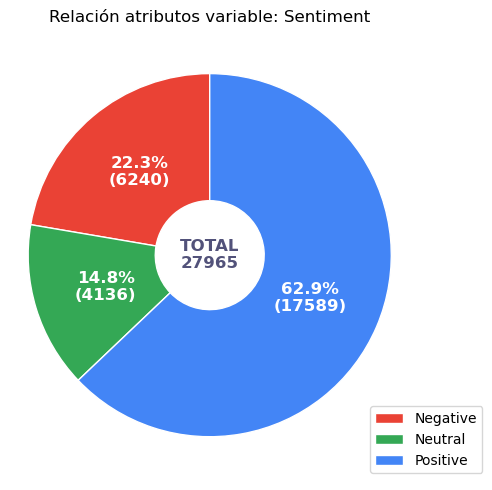

In [50]:
tgtcol = ['Sentiment']
rev.dona(tgtcol)

<div class="alert alert-block alert-warning">
    <b>Datos desbalanceados:</b> 
    <p>Se observa que la columna Sentiment, tiene tres atributos:
        <ul>
            <li>Negativo</li>
            <li>Neutral</li>
            <li>Positivo</li>
        </ul>
    También se ve que el dataset esta <strong>cargado</strong> hacia el atributo Positivo
</div>

In [51]:
df.drop(df[df['Sentiment']=='Neutral'].index,inplace=True)
df.loc[df['Sentiment'] == 'Positive', 'Sentiment'] = 1
df.loc[df['Sentiment'] == 'Negative', 'Sentiment'] = 0
df['Sentiment'] = df['Sentiment'].astype('int64')

In [52]:
rev = EDA(df)
rev.infoplus()

,columna,tipo,total,faltantes,pct,unico
0,Sentiment,int64,23829,0,100.0,2
1,Reviews,object,23829,0,100.0,23829
2,largo_pre,int64,23829,0,100.0,643


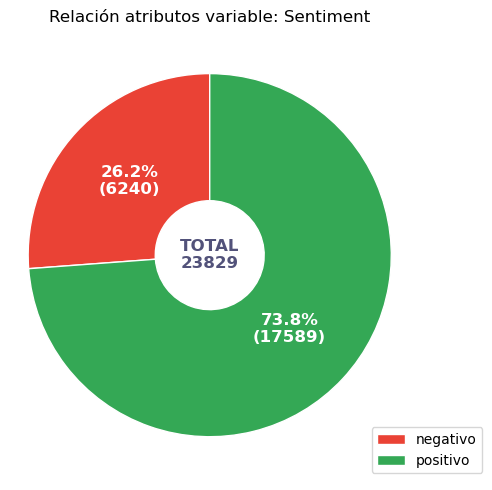

In [53]:
rev.dona(tgtcol, {1:'positivo',0:'negativo'})

<div class="alert alert-block alert-warning">
    <b>Datos objetivos:</b> 
    <p>Para este caso en particular, interesan solo los atributos:
        <ul>
            <li>Negativo</li>
            <li>Positivo</li>
        </ul>
    Con los cuales se procederá a realizar el EDA y el entrenamiento del modelo
</div>

# Normalización

In [54]:
txt = NLP()

<div class="alert alert-block alert-info">
    <b>Normalizacion o limpieza:</b> 
    <p>La siguiente función, realizara la normalización del dataset, tales como:
    <ul>
        <li>Cambiar todo el texto a minusculas
        <li>Expandir las contracciones de idioma inglés
        <li>Remover referencias a usuarios y hashtags
        <li>Eliminar etiquetas html y URLs
        <li>Remover los simbolos de puntuación
        <li>Quitar numeros
        <li>Remover caracteres solitarios, aquellos que tienen uno o dos solo caracteres
        <li>Quitar espacios
        <li>Eliminar palabras de parada, con la excepción de NO y NOT
    </ul>
</div>

In [55]:
def limpieza(sentencias, verbose = False):
    # Data original
    if verbose == True : print('*'*25,'Dataset antes de la limpieza','*'*25,'\n' )
    if verbose == True : print(sentencias.head(),'\n')
    #display(df['text'].head())
    
# Texto en minuscula
    sentencias = sentencias.apply(lambda x: x.lower())
    if verbose == True : print('*'*5,'minusculas:\n',sentencias.head(),'\n')
    
# Expandir 
    sentencias = sentencias.apply(lambda x : txt.expandir_contraccion(x))
    if verbose == True : print('*'*5,'expandir:\n',sentencias.head(),'\n')
    
# Remover referencias a usuarios como @switchfoot #charitytuesday
    pttrn = '(@|#)\w+'
    sentencias = sentencias.apply(lambda x: txt.quitar_patron(x, pttrn))
    if verbose == True : print('*'*5,'quitar usuarios:\n',sentencias.head(),'\n')
    
# Remover html
    pttrn = '<.*?>'
    sentencias = sentencias.apply(lambda x : txt.quitar_patron(x, pttrn))
    if verbose == True : print('*'*5,'quitar html:\n',sentencias.head(),'\n')
    
# Remover los URL de los tuits
    pttrn = r'https?://\S+|www\.\S+'
    sentencias = sentencias.apply(lambda x : txt.quitar_patron(x, pttrn))
    if verbose == True : print('*'*5,'quitar URL:\n',sentencias.head(),'\n')
    
# Remover basura
    pttrn = '&[\w]+;|lol|https?|_'
    sentencias = sentencias.apply(lambda x : txt.quitar_patron(x, pttrn))
    if verbose == True : print('*'*5,'quitar basura:\n',sentencias.head(),'\n')
        
# Remover signos de puntuación
    pttrn = '\W'
    sentencias = sentencias.apply(lambda x : txt.quitar_patron(x, pttrn))
    if verbose == True : print('*** quitar simbolos:\n',sentencias.head(),'\n')
    
# Remover números
    pttrn = '\d+'
    sentencias = sentencias.apply(lambda x : txt.quitar_patron(x, pttrn))
    if verbose == True : print('*'*5,'quitar numeros:\n',sentencias.head(),'\n')

# Remover caracteres solitarios
    for i in range(0,2):
        pttrn = '\s(\w{1,2})\s'
        sentencias = sentencias.apply(lambda x : txt.quitar_patron(x, pttrn))
    if verbose == True : print('*'*5,'quitar solitarios:\n',sentencias.head(),'\n')  
    
# Remover espacios
    sentencias = sentencias.apply(lambda x:txt.quitar_espacios(x))
    if verbose == True : print('*'*5,'quitar espacios:\n',sentencias.head(),'\n')

# Eliminar las palabras de parada
    excepstop = ['no','not'] #['no','not']
    addstop = [] #['im','dc','go','na','oh']
    sentencias = sentencias.apply(lambda x:txt.quitar_stopwords(x,excepstop,addstop))
    #if verbose == True : print('*'*5,'quitar stopwords:\n',sentencias.head(),'\n')
    
    if verbose == True : print('\n','*'*25,'Dataset luego de la limpieza','*'*25,'\n')
    if verbose == True : print(sentencias.head())
    #print(df['text'].tail())    
    
    return sentencias

In [56]:
%%time 
df['Reviews'] = limpieza(df['Reviews'],True) #True

************************* Dataset antes de la limpieza ************************* 

0    I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"
1    This help eating healthy exercise regular basis                                                                           
3    Works great especially going grocery store                                                                                
4    Best idea us                                                                                                              
5    Best way                                                                                                                  
Name: Reviews, dtype: object 

***** minusculas:
 0    i like eat delicious food. that's i'm cooking food myself, case "10 best foods" helps lot, also "best before (shelf life)"
1    this help eating healthy exercise regular basis                                               

In [57]:
df.head()

,Sentiment,Reviews,largo_pre
0,1,like eat delicious food cooking food case best foods helps lot also best shelf life,122
1,1,help eating healthy exercise regular basis,47
3,1,works great especially going grocery store,42
4,1,best idea us,12
5,1,best way,8


In [58]:
df['largo_post'] = df['Reviews'].apply(lambda x : len(x))

In [59]:
# Se eliminaran registros cuyo contenido solo contenga 2 caracteres

if df[df['largo_post'] < 3].shape[0] > 0:
    print('***** Se eliminaron',df[df['largo_post'] < 3].shape[0],'registros')
    df.drop(df[df['largo_post'] < 3].index, inplace=True)

***** Se eliminaron 23 registros


In [60]:
print(f'\n***** El dataset coniene {df.shape[0]} registros y {df.shape[1]} atributos\n')
df.head()


***** El dataset coniene 23806 registros y 4 atributos



,Sentiment,Reviews,largo_pre,largo_post
0,1,like eat delicious food cooking food case best foods helps lot also best shelf life,122,83
1,1,help eating healthy exercise regular basis,47,42
3,1,works great especially going grocery store,42,42
4,1,best idea us,12,12
5,1,best way,8,8


In [61]:
post = EDA(df[['Sentiment','Reviews','largo_pre','largo_post']])

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sentiment,23806.0,0.737881,0.439796,0.0,0.0,1.0,1.0,1.0
largo_pre,23806.0,123.726792,105.734970,3.0,46.0,99.0,173.0,2713.0
largo_post,23806.0,105.594346,90.998370,3.0,39.0,84.0,148.0,2288.0


In [63]:
post.infoplus()

,columna,tipo,total,faltantes,pct,unico
0,Sentiment,int64,23806,0,100.0,2
1,Reviews,object,23806,0,100.0,23162
2,largo_pre,int64,23806,0,100.0,643
3,largo_post,int64,23806,0,100.0,570


## Separación datos en pos y neg

In [64]:
neg = df[df['Sentiment'] == 0]
print(neg.shape)
neg.head(3)

(6240, 4)


,Sentiment,Reviews,largo_pre,largo_post
32,0,no recipe book unable recipe book,34,33
43,0,waste time needs internet time ask calls information,57,52
68,0,faltu plz waste time,23,20


In [65]:
pos = df[df['Sentiment'] == 1]
print(pos.shape)
pos.head(3)

(17566, 4)


,Sentiment,Reviews,largo_pre,largo_post
0,1,like eat delicious food cooking food case best foods helps lot also best shelf life,122,83
1,1,help eating healthy exercise regular basis,47,42
3,1,works great especially going grocery store,42,42


In [66]:
def merge(texto):
    return " ".join(review for review in texto)

txtpos = merge(pos['Reviews'])
txtneg = merge(neg['Reviews'])

def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be|im|not", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    #print(tmpDict)
    return fullTermsDict

def top_text(top,texto):
    comun = nltk.FreqDist(texto)
    return comun.most_common(top)

def listas(texto):
    for i in range(0,len(texto)):
        x=[]
        y=[]
        z=[]
        for j in range(0,len(texto[i])):
            x.append(texto[i][j][0])
            y.append(texto[i][j][1])
            z.append(j)
        wordx.append(x)
        freqx.append(y)
        posx.append(z)
        
def nube(text, mask, color):
    wc = WordCloud(
        background_color='white',
        mask=mask,
        #contour_width=1,
        #contour_color='steelblue',
        colormap=color,
        collocation_threshold=5)
    return wc.generate_from_frequencies(text)

In [67]:
print('len palabras positivas',len(txtpos.split()))
print('len palabras negativas',len(txtneg.split()))
print('total',len(txtpos.split())+len(txtneg.split()))

len palabras positivas 276295
len palabras negativas 106548
total 382843


In [68]:
wordpos = getFrequencyDictForText(txtpos)
wordneg = getFrequencyDictForText(txtneg)
    
top = 10
toppos = top_text(top, wordpos)
topneg = top_text(top, wordneg)

In [69]:
wordx=[]
freqx = []
posx = [] 
qwerty = ['positiva','negativas']
texto = [toppos,topneg] 
listas(texto)

In [70]:
cm = [plt.colormaps.get_cmap('Blues'),plt.colormaps.get_cmap('Reds')]
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
width = 1.0

## Top de palabras

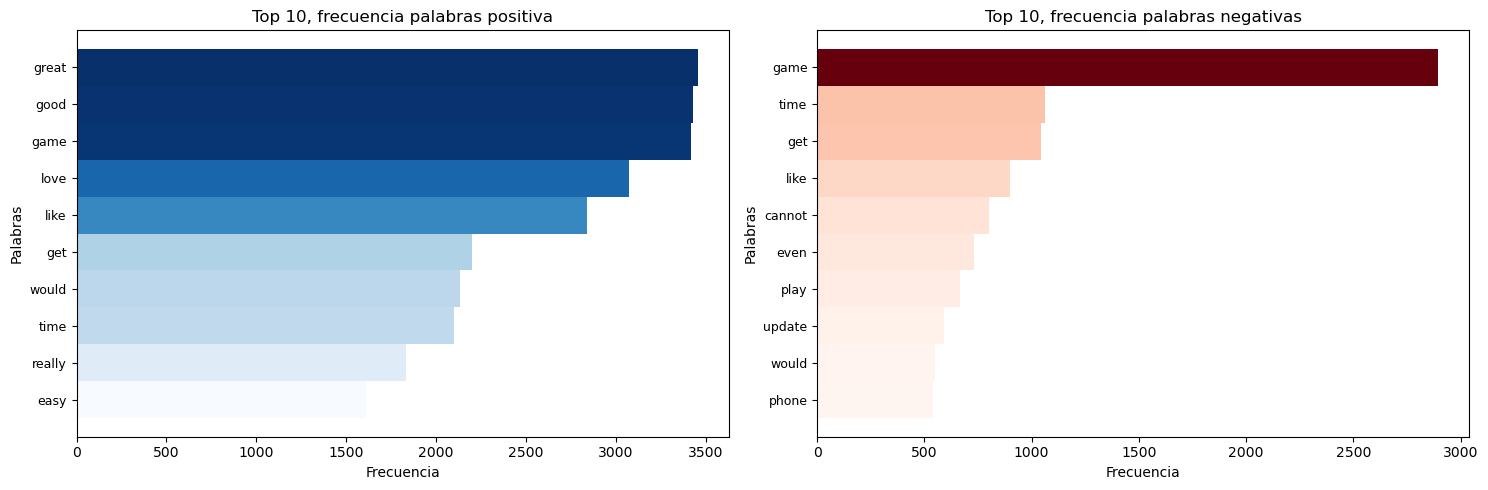

In [71]:
qty = 2
fig, ax = plt.subplots(1, qty,figsize=(15,5))
#ax = plt.axes(frameon=True)
for i in range(0, qty):
    ax[i].set_yticks(posx[i])
    ax[i].set_yticklabels(wordx[i], rotation='horizontal', fontsize=9) 
    ax[i].invert_yaxis() 
    ax[i].set_title('Top ' + str(top) + ', frecuencia palabras ' + qwerty[i]) 
    ax[i].barh(posx[i], freqx[i], width, color=cm[i](rescale(freqx[i]))) 
    ax[i].set_xlabel('Frecuencia')
    ax[i].set_ylabel('Palabras') 
    
plt.tight_layout()  
plt.show()

<div class="alert alert-block alert-warning">
    <b>Top de palabras:</b> 
    <ul>
        <li>Se puedes observar cual es el top de palabras más utilizadas según Sentiment, si son positivas en azul y negativas en rojo
    </ul>
</div>

In [72]:
maskp = np.array(Image.open('data/play.png'))
maskn = np.array(Image.open('data/play.png').transpose(Image.FLIP_LEFT_RIGHT)) #.transpose(Image.FLIP_LEFT_RIGHT)

In [73]:
colorpos = ImageColorGenerator(maskp)
colorneg = ImageColorGenerator(maskn)
poscloud = nube(wordpos,maskp,'Blues_r')
negcloud = nube(wordneg,maskn,'Greys_r')

## Nube de palabras

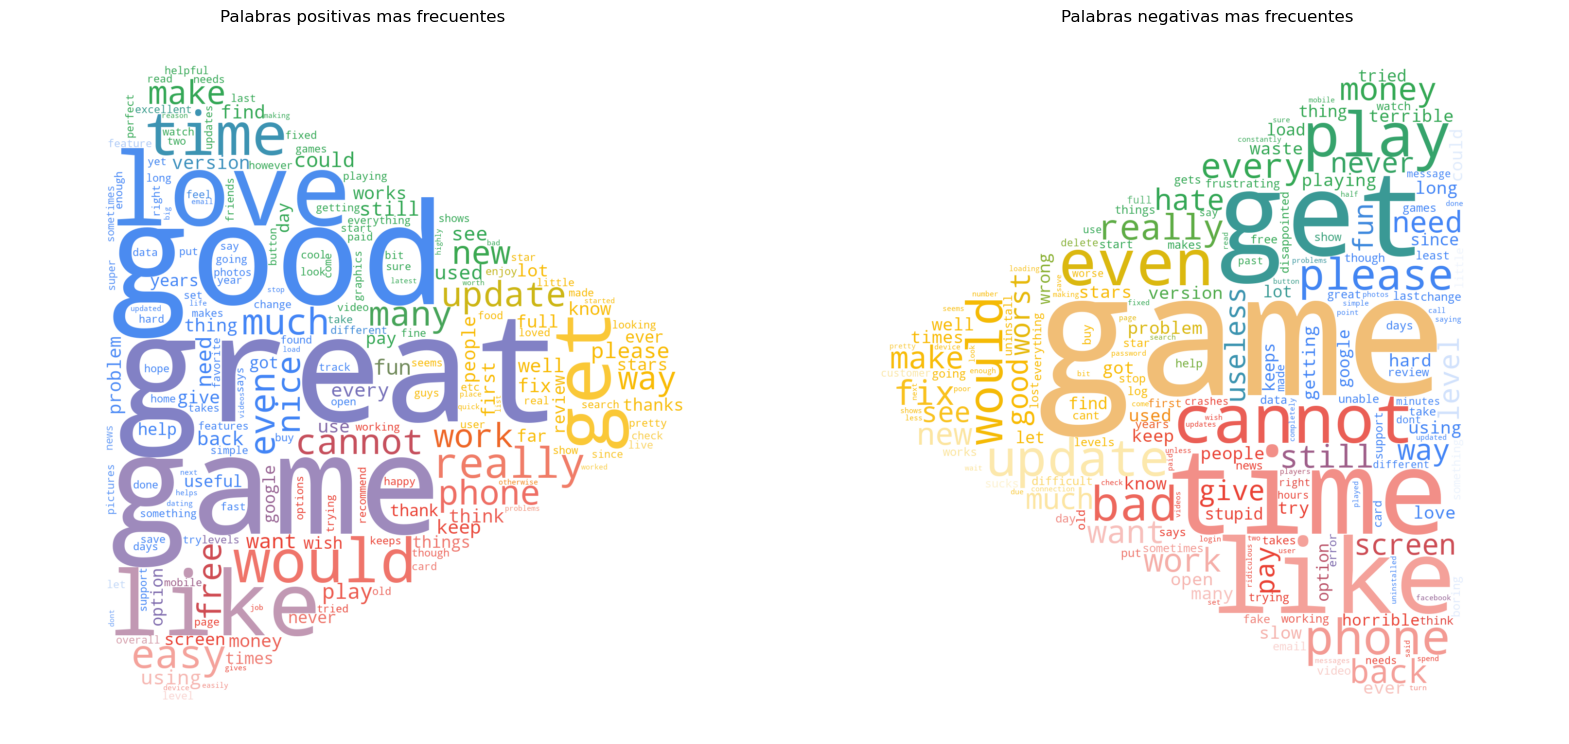

In [74]:
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.imshow(poscloud.recolor(color_func=colorpos),interpolation='bilinear')  
plt.title('Palabras positivas mas frecuentes')
plt.axis("off")
 

plt.subplot(1,2,2)
plt.imshow(negcloud.recolor(color_func=colorneg),interpolation='bilinear')  #color_func=colorneg #random_state=123
plt.title('Palabras negativas mas frecuentes')
#plt.savefig('palabras_negativas',bbox_inches='tight')
plt.axis("off")

plt.show()

<div class="alert alert-block alert-info">
    <b>WordCloud:</b> 
    <ul>
        <li>La nube de palabras nos muestra las frecuencias de las palabras más utilizadas, tanto con sentido positivo, como negativo
    </ul>
</div>

# Actividad 3: Vectorización
Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos.

In [75]:
idle, poss = train_test_split(pos, test_size=neg.shape[0], random_state=42)

In [76]:
result = pd.concat([neg,poss])

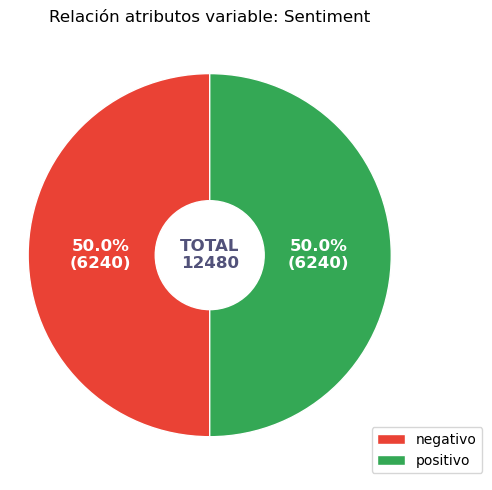

In [77]:
rev = EDA(result)
rev.dona(tgtcol, {1:'positivo',0:'negativo'})

<div class="alert alert-block alert-warning">
    <b>Datos balanceados:</b> 
<p>Se porocedio a tomar una muestra de los Sentimientos positivos, del mismo tamaño que los negativos. Para luego concatenar ambos dataframes en uno.
<p>Con este nuevo dataframe, resultado, se procedera a entrenar el modelo.

</div>

In [78]:
X = result['Reviews']
y = result['Sentiment']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.80, random_state=19)

In [80]:
type(X_train)

pandas.core.series.Series

In [81]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def vectorizar_txt(documents, feature_type='tfidf',ngram_range=(1, 1), min_df=0.0, max_df=1.0):

    feature_type = feature_type.lower().strip()  
    vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df,ngram_range=ngram_range)
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix

## Vectorización TF-IDF

<div class="alert alert-block alert-info">
    <b>TF-IDF:</b> 
    <p>Se decidio usar TF-IDF, debido a:
    <ul>
        <li>Que permite conocer cuán relevante es un término en una colección de documentos dados.
        <li>Relevancia semántica.
        <li>Diferenciación de contenido.
        <li>Optimización precisa de palabras clave.
    </ul>
</div>

In [82]:
vectorizer, train_features = vectorizar_txt(documents=X_train,
                                                  feature_type='tfidf', 
                                                  ngram_range=(1, 1), 
                                                  min_df=0.0, 
                                                  max_df=1.0)

In [83]:
vectorizer

TfidfVectorizer(min_df=0.0)

# Funciones para calcular métricas

In [84]:
metricas = []
modelos = []
mediciones = ['Accuracy','Precision','Sensitivity(Recall)','F1 Score']

## Obtener métricas

In [85]:
from sklearn import metrics
def obtener_metricas(true_labels, predicted_labels):
    metrics_list = []
    metrics_dict = {'Accuracy':np.round(metrics.accuracy_score(true_labels,predicted_labels),4),
                    'Precision':np.round(metrics.precision_score(true_labels,predicted_labels,average='weighted'),4),
                    'Recall':np.round(metrics.recall_score(true_labels,predicted_labels,average='weighted'),4),
                    #'Specifity':np.round(metrics.recall_score(true_labels,predicted_labels,average='weighted',pos_label=0),4),
                    'F1 Score':np.round(metrics.f1_score(true_labels,predicted_labels,average='weighted'),4)}
    for item in metrics_dict:
        print(item,':',metrics_dict[item])
        metrics_list.append(metrics_dict[item])
    return metrics_list

## Matriz de confusión

In [86]:
def confusion_matrix(true_labels, predicted_labels, lbl_dicc=[]):
    classes = []
    lblclas = []
    for item in lbl_dicc.items():
        classes.append(item[0]),
        lblclas.append(item[1])

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels,labels=classes)
    print(cm,'\n') 
    
    fig, ax = plt.subplots()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Creación del mapa de calor
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm_r" ,fmt='d', #'PiYG'
               xticklabels=lblclas,
               yticklabels=lblclas)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()

    plt.title('Matriz de Confusión', y=1.1)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiquieta prediccion')
    plt.savefig('img/matriz_confusion',bbox_inches='tight')
    plt.show()    

## Porcentajes métricas

In [87]:
gcolor = ['#ea4235','#34a855','#4385f6','#f9bb04','black']
def porcentajes(data,titulo):
    #colores =['#ee2f5a','#0098db','#a53692','#51a8b1']#['#1f77b4','#fb7f0f',]
    fig, ax = plt.subplots(1, len(data),figsize=(len(data)*4,4)) 
    for i in range(0,len(data)):
        #pct = []
        if len(data) == 1:
            pct = [data[i],100-data[i]]
            ax.set_title(titulo[i])
            ax.pie(pct,
                   radius=1,
                   colors = [gcolor[i],'lightgrey'], #b5b5b5:gris #d2d3d5:gris #ffffff:blanco #141f35_gris
                   startangle = 90,
                   counterclock=False,
                   wedgeprops=dict(width=0.7, edgecolor='w')
                  )

            plt.text(0,0, f'{data[i]}%',
                            weight='bold', size=18, color='#52527a',
                             ha='center', va='center')
        else:
            pct = [data[i],100-data[i]]
            ax[i].set_title(titulo[i])
            ax[i].pie(pct,
                   radius=1,
                   colors = [gcolor[i],'lightgrey'], #b5b5b5
                   startangle = 0,
                   counterclock=True,
                   wedgeprops=dict(width=0.7, edgecolor='w')
                  )
            ax[i].text(0,0, f'{data[i]}%',
                            weight='bold', size=18, color='#52527a',
                             ha='center', va='center')
            ax[i].axis('equal')
    #plt.tight_layout() 
    plt.show()

# Entrenamiento modelo
La seleccón del modelo fue, Máquinas de Vector Soporte, ya que no había utilizado este modelo anteriormente 

## SVM (Máquinas de Vector Soporte)

In [88]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(train_features, y_train)
modelos.append('svc')

In [89]:
svc

SVC(gamma='auto', kernel='linear')

In [90]:
import joblib
joblib.dump(svc, 'svc.pkl')

['svc.pkl']

In [91]:
test_features_svc = vectorizer.transform(X_test)

In [92]:
predicted_sentiments_svc = svc.predict(test_features_svc)

### Métricas

In [93]:
metricas.append(obtener_metricas(true_labels=y_test, 
            predicted_labels=predicted_sentiments_svc))

Accuracy : 0.8878
Precision : 0.8886
Recall : 0.8878
F1 Score : 0.8877


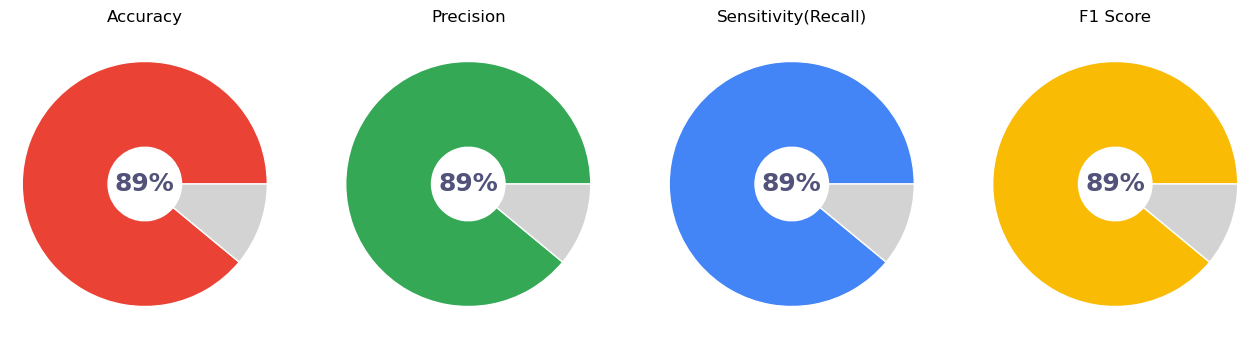

In [94]:
dat = metricas[0]
dat = list(map(lambda x:int(round(100*x,0)), dat))
porcentajes(dat,mediciones)

<div class="alert alert-block alert-warning">
    <b>Metricas:</b> 
<p>Podemos observar los resultados de las métricas más utilizadas
<br>No hay grandes difernecias entre ellas.
<br>Podríamos decir que el modelo tiene un 89% de efectividad.

</div>

### Matriz de confusión

[[1055  169]
 [ 111 1161]] 



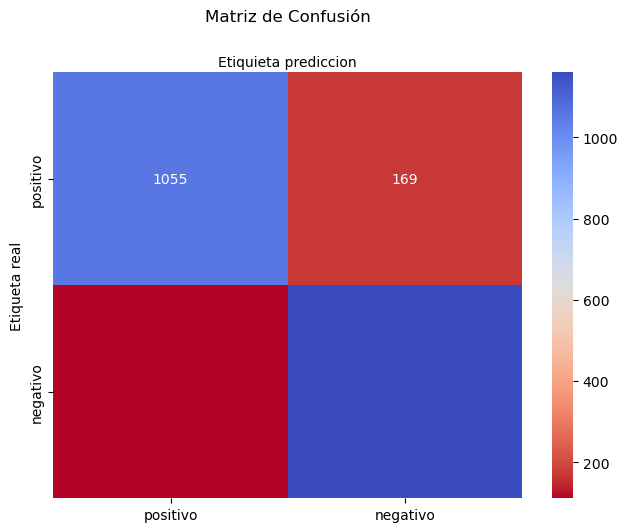

In [95]:
confusion_matrix(true_labels=y_test, 
                 predicted_labels=predicted_sentiments_svc,
                lbl_dicc = {1:'positivo',0:'negativo'})

---

## Reporte clasificación

In [96]:
print('Máquinas de Vector Soporte:\n',metrics.classification_report(predicted_sentiments_svc,y_test))

Máquinas de Vector Soporte:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1330
           1       0.86      0.90      0.88      1166

    accuracy                           0.89      2496
   macro avg       0.89      0.89      0.89      2496
weighted avg       0.89      0.89      0.89      2496



---

# Pruebas
A continuación se muestran algunas sugerencias de texto, que no fueron utilizadas en el entrenamiento del modelo

In [97]:
muestra,_ = train_test_split(idle, train_size=10, stratify=idle['Sentiment'])
muestra[['Reviews','Sentiment']]

,Reviews,Sentiment
5932,love let lack room phone,1
39071,ok food preparation alright could involve salads,1
35169,convenient,1
32241,interesting creative,1
24004,cool easy use started using hold back star,1
8205,liked using constant push premium annoying interested yet receive notifications everyday every time open app notification bottom screen promotion spamming people good business practice deleted app,1
4044,good helping much things doctar asking happened home ask ada happy,1
39321,think good attempt technical hitches overcome rapid transfer working since upgrade open,1
59602,hair beautiful bcoz,1
10867,great simple year old like use bugs task bar trying edit home screen clicked comes cannot run application big launcher preferences edit home screen whatsapp installed contact also whatsapp number displayed twice,1


---

In [98]:
texxto = input('Ingrese un texto: \n')

Ingrese un texto: 
 convenient


In [99]:
prueba = {'Reviews':texxto}
dfp = pd.DataFrame.from_dict([prueba])
dfp = limpieza(dfp['Reviews'])
test_features = vectorizer.transform(dfp)
predicted_sentiments = svc.predict(test_features)

In [100]:
enunciado = 'El texto ingresado es:'
if predicted_sentiments[0] == 0:
    print(enunciado,'\033[1m Negativo \033[1m')
else:
    print(enunciado,'\033[1m Positivo \033[1m')

El texto ingresado es:  Positivo 


---

## Prueba del modelo desde archivo

In [101]:
import json

with open('result.json', 'w') as fp:
    json.dump(prueba, fp)

In [102]:
def predict():
    json_ = json.load(open('result.json'))
    query_df = pd.DataFrame(json_, index=[0])
    dfp = limpieza(query_df['Reviews'])
    test_features = vectorizer.transform(dfp)
    
    classifier = joblib.load('svc.pkl')
    prediction = classifier.predict(test_features)
    print(prediction[0])
    if prediction[0] :
        return "TRUE: la 'Review' es positiva'"
    else :
        return "FALSE: la 'Review' es negativa"

In [103]:
predict()

1


"TRUE: la 'Review' es positiva'"